In [2]:
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
OUTPUT = "./datasets/"

# Distributions Exercises

Identify:

* Random variable types
* FDP, FDA, FMP

## Dataset 1: Joint child malnutrition estimates – 2017 edition

Datasource: https://data.unicef.org/topic/nutrition/malnutrition/

* Severe Wasting: Percentage of children aged 0–59 months who are below minus three standard deviations from median weight-for-height of the WHO Child Growth Standards.
* Wasting – Moderate and severe: Percentage of children aged 0–59 months who are below minus two standard deviations from median weight-for-height of the WHO Child Growth Standards.
* Overweight – Moderate and severe: Percentage of children aged 0-59 months who are above two standard deviations from median weight-for-height of the WHO Child Growth Standards. 
* Stunting – Moderate and severe: Percentage of children aged 0–59 months who are below minus two standard deviations from median height-for-age of the WHO Child Growth Standards.
* Underweight – Moderate and severe: Percentage of children aged 0–59 months who are below minus two standard deviations from median weight-for-age of the World Health Organization (WHO) Child Growth Standards

In [5]:
d1 = pd.read_csv(OUTPUT+'dataset1_joint_child_malnutrition_estimates.csv')

d1c = d1[['Region', 'Country and areas', 'Year', 'Severe wasting',  \
    'Wasting',  'Overweight',  'Stunting',  'Underweight']].copy()

d1c.sort_values(by=['Region', 'Country and areas', 'Year'], inplace=True)

In [6]:
d1c[(d1c.Year == 2000)].groupby(['Region'])["Severe wasting"].count()

Region
AFRICA      24
ASIA        13
EUROPE       4
LATINAME     8
Name: Severe wasting, dtype: int64

Answer after analyze the figures below
1. Looking to Density Chart, which curve represents the worst region in terms of Severe Wasting? How to calculate this?
1. What is the probability of a country in Africa and Asia be under 1% of Severe Wasting?
1. Is the Histogram a visualization good to understand the behavior?
1. What is the difference between `stats.uniform.pdf` and `stats.uniform.cdf`

AFRICA         Axes(0.1,0.15;0.363636x0.75)
ASIA      Axes(0.536364,0.15;0.363636x0.75)
dtype: object

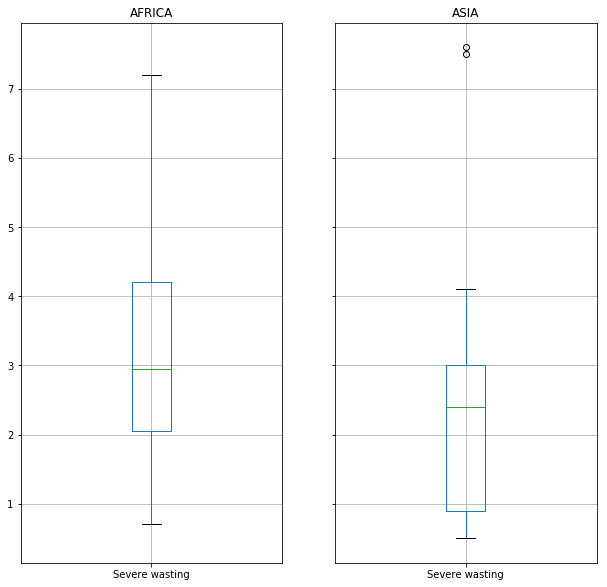

In [7]:
d1c[(d1c.Region.isin(['AFRICA', 'ASIA']))&(d1c.Year == 2000)][['Severe wasting', 'Region']]\
                        .groupby('Region').boxplot(figsize=(10,10))

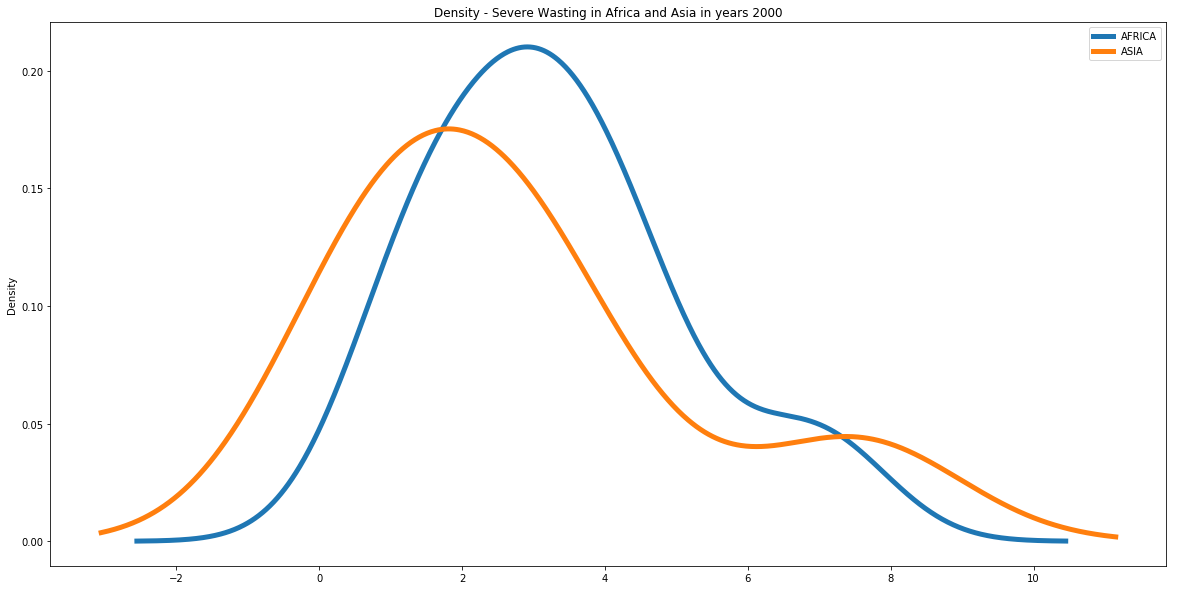

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))

bp = d1c[(d1c.Region.isin(['AFRICA', 'ASIA']))&(d1c.Year == 2000)]\
                    .groupby('Region')['Severe wasting']\
                    .plot.density(legend=True, linewidth=5, 
                                  title='Density - Severe Wasting in Africa and Asia in years 2000')

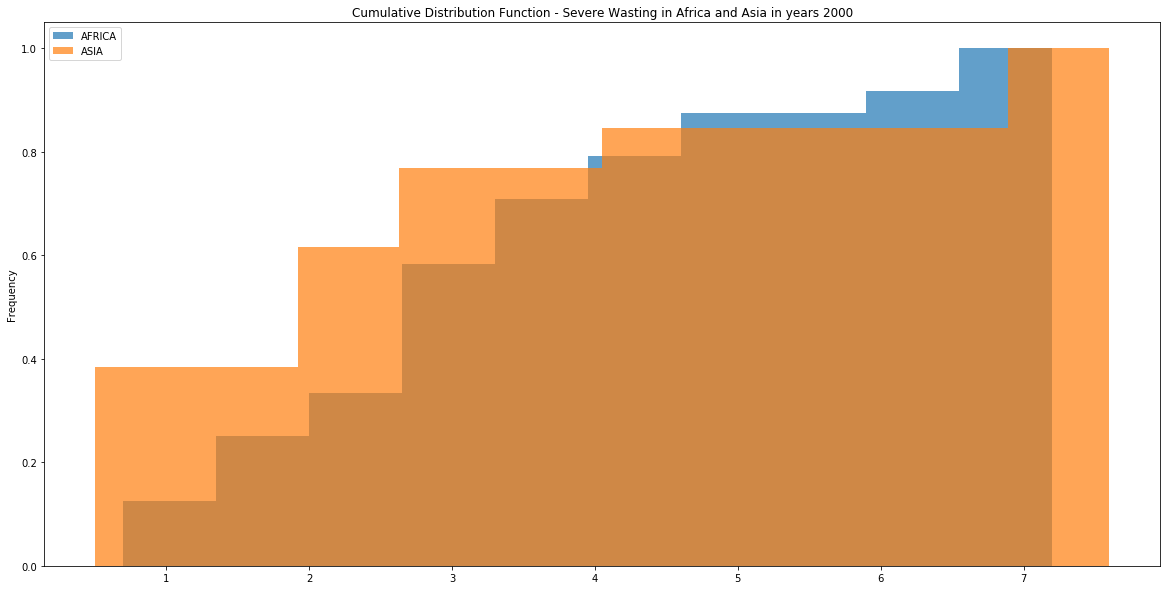

In [22]:
import matplotlib.pyplot as plt3

fig3, ax3 = plt.subplots(figsize=(20,10))

bp3 = d1c[(d1c.Region.isin(['AFRICA', 'ASIA']))&(d1c.Year == 2000)]\
                    .groupby('Region')['Severe wasting']\
                    .plot.hist(cumulative=True, legend=True, normed=True, alpha=0.7,
                                  title='Cumulative Distribution Function - Severe Wasting in Africa and Asia in years 2000')

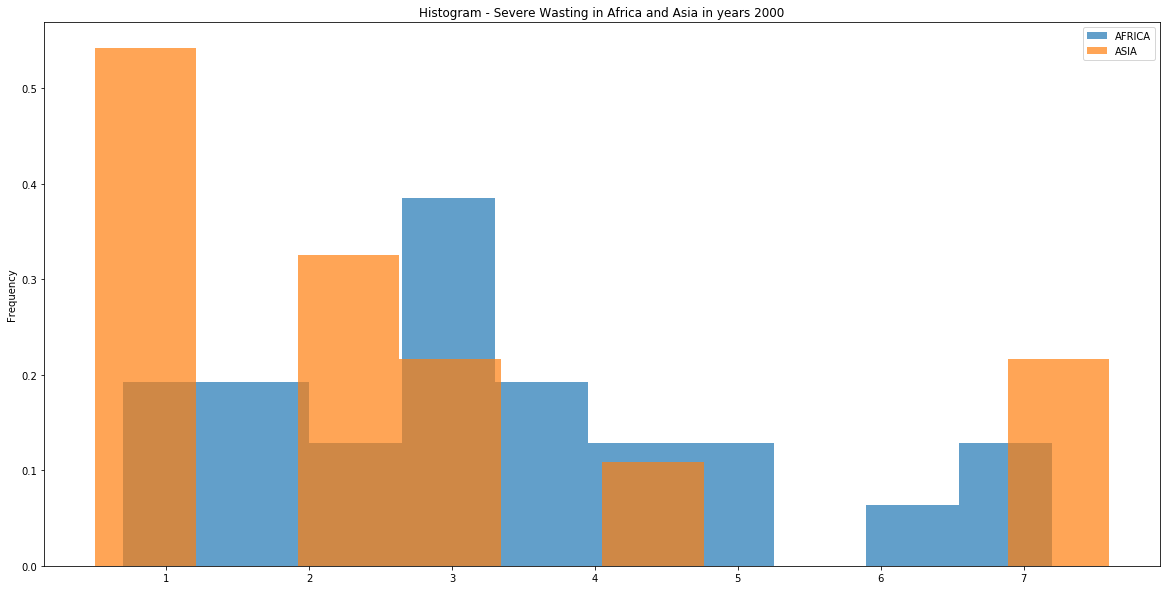

In [25]:
import matplotlib.pyplot as plt2

fig2, ax2 = plt2.subplots(figsize=(20,10))

bp = d1c[(d1c.Region.isin(['AFRICA', 'ASIA']))&(d1c.Year == 2000)]\
                    .groupby('Region')['Severe wasting']\
                    .plot.hist(legend=True, normed=True, alpha=0.7,
                               title='Histogram - Severe Wasting in Africa and Asia in years 2000')